## Construct allele by similarity allele table

In [1]:
import os 
import sys
from cphasing.core import AlleleTable 
import igraph
import matplotlib as mpl 
import matplotlib.pyplot as plt 

import pandas as pd 

In [18]:
os.chdir("/data3/wangyb/0.CPhasing/0.simulation/AT_remove_inter_raw/align_data/ploidy-12/50k/C-Phasing/alleles_different_parameters/0.1")

In [22]:
at = AlleleTable("test.prune.contig.table", fmt="allele2", sort=False)

ValueError: Length mismatch: Expected axis has 5 elements, new values have 7 elements

In [20]:
at.data

,1,2,mz1,mz2,mzShared,similarity,strand
0,1A.ctg1,1B.ctg1,4220,2027,1975,0.976163,1
1,1A.ctg1,1B.ctg2,4220,1523,1515,0.966906,1
2,1A.ctg1,1B.ctg3,4220,3988,640,0.906828,1
3,1A.ctg1,1C.ctg1,4220,1708,1624,0.968830,1
4,1A.ctg1,1C.ctg2,4220,3020,2457,0.979810,1
...,...,...,...,...,...,...,...
664429,5L.ctg462,5K.ctg536,56663,2459,2427,0.876719,1
664430,5L.ctg462,5K.ctg537,56663,4829,4723,0.906109,1
664431,5L.ctg462,5K.ctg538,56663,4630,4474,0.903684,1
664432,5L.ctg462,5K.ctg539,56663,4209,4118,0.900075,1


In [5]:
at.data[[1, 2]].values.tolist()

[['1A.ctg1', '1B.ctg1'],
 ['1A.ctg1', '1B.ctg2'],
 ['1A.ctg1', '1B.ctg3'],
 ['1A.ctg1', '1C.ctg1'],
 ['1A.ctg1', '1C.ctg2'],
 ['1A.ctg1', '1D.ctg1'],
 ['1A.ctg1', '1E.ctg1'],
 ['1A.ctg1', '1E.ctg2'],
 ['1A.ctg1', '1F.ctg1'],
 ['1A.ctg1', '1F.ctg2'],
 ['1A.ctg1', '1G.ctg1'],
 ['1A.ctg1', '1G.ctg2'],
 ['1A.ctg1', '1H.ctg1'],
 ['1A.ctg1', '1H.ctg2'],
 ['1A.ctg1', '1I.ctg1'],
 ['1A.ctg1', '1J.ctg1'],
 ['1A.ctg1', '1J.ctg2'],
 ['1A.ctg1', '1K.ctg1'],
 ['1A.ctg1', '1K.ctg2'],
 ['1A.ctg1', '1L.ctg1'],
 ['1A.ctg2', '1B.ctg3'],
 ['1A.ctg2', '1B.ctg4'],
 ['1A.ctg2', '1C.ctg2'],
 ['1A.ctg2', '1C.ctg3'],
 ['1A.ctg2', '1D.ctg2'],
 ['1A.ctg2', '1D.ctg3'],
 ['1A.ctg2', '1D.ctg4'],
 ['1A.ctg2', '1E.ctg2'],
 ['1A.ctg2', '1E.ctg3'],
 ['1A.ctg2', '1F.ctg3'],
 ['1A.ctg2', '1F.ctg4'],
 ['1A.ctg2', '1F.ctg5'],
 ['1A.ctg2', '1G.ctg2'],
 ['1A.ctg2', '1G.ctg3'],
 ['1A.ctg2', '1H.ctg2'],
 ['1A.ctg2', '1H.ctg3'],
 ['1A.ctg2', '1I.ctg2'],
 ['1A.ctg2', '1J.ctg2'],
 ['1A.ctg2', '1J.ctg3'],
 ['1A.ctg2', '1J.ctg4'],


In [14]:
idx_db = dict(zip(range(len(at.contigs)), sorted(at.contigs)))
contig_idx_db = dict(zip( sorted(at.contigs), range(len(at.contigs))))
l = list(zip(at.data[1].map(contig_idx_db.get), at.data[2].map(contig_idx_db.get)))


In [15]:
g = igraph.Graph(n=len(at.contigs))
g.add_edges(l)
g.es['weight'] = at.data['mzShared']
g = g.simplify()

In [7]:
communities = g.community_edge_betweenness()
communities = communities.as_clustering()

In [8]:
num_communities = len(communities)
palette = igraph.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

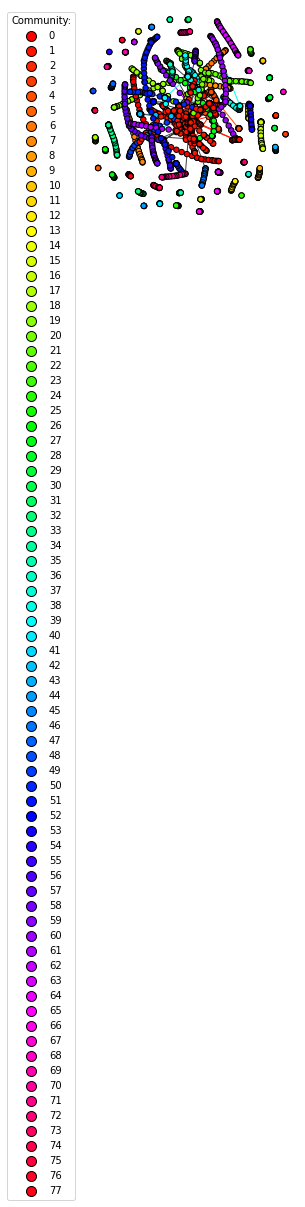

In [9]:
fig, ax = plt.subplots()
igraph.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=20,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)

In [58]:
for _g in communities.subgraphs():
    if _g.vcount() > 50:
        break
        print(_g.vcount())

(4, 10)
(5, 12)
(4, 12)
(4, 11)
(2, 9)
(2, 8)
(1, 8)
(0, 6)
(0, 7)
(0, 8)
(3, 10)
(3, 9)


In [16]:
cliques = g.maximal_cliques()

In [24]:
cached_set = set()
with open('clique.ctg.table', 'w') as out:
    for i, clique in enumerate(map(sorted, cliques)):
        # print("\t".join(idx_db[i] for i in clique))
        if len(clique) < 2:
            continue

        clique = tuple(clique)
        if clique in cached_set:
            continue 
        print(f"{i}\t{i}\t" + "\t".join(idx_db[i] for i in clique) + "\t", file=out)
        cached_set.add(clique)
        # if len(clique) <= 12:    
        #     print("\t".join(idx_db[i] for i in clique))



In [10]:
igraph.plot(_g)

NameError: name '_g' is not defined

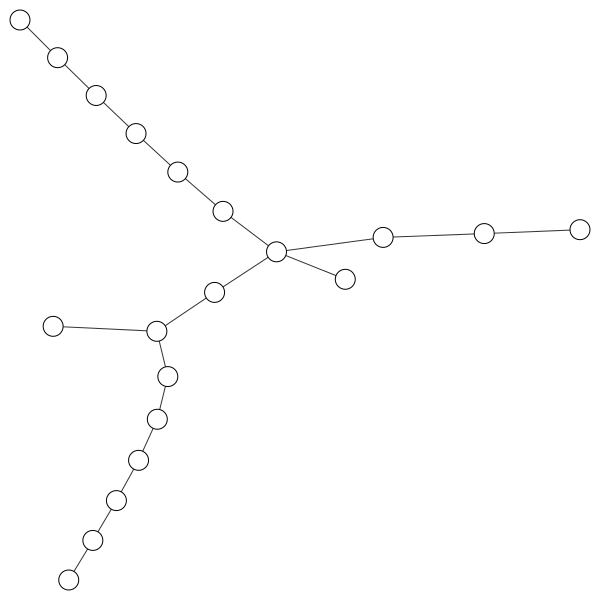

In [24]:
igraph.plot(communities.subgraphs()[50].spanning_tree(), 
             vertex_color="white",
            vetex_label=list(
                pd.DataFrame(zip(at.contigs, communities.membership
                                 )).set_index(1).loc[51].values.flatten()))

In [86]:
__g = communities.subgraphs()[50]


In [21]:
list(pd.DataFrame(zip(at.contigs, communities.membership)).set_index(1).loc[50].values.flatten())

['4F.ctg34',
 '5E.ctg209',
 '5E.ctg144',
 '1E.ctg37',
 '3F.ctg226',
 '3F.ctg202',
 '2E.ctg126',
 '1E.ctg335',
 '5E.ctg183',
 '5F.ctg268',
 '3F.ctg169',
 '5E.ctg124',
 '3E.ctg61',
 '1E.ctg54',
 '3F.ctg19',
 '3E.ctg142',
 '1F.ctg297',
 '2F.ctg67',
 '4F.ctg172',
 '2E.ctg191']

In [26]:
communities.subgraphs()[50].vs